# Feature Engineering

##### This the process of extracting useful features from raw data using Maths,Statistics and Domain Knowledge

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
df= pd.read_csv('heights.csv')

In [3]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


### Getting rid of an outlier of above 95 percentile of the height feature/column

In [4]:
max_thold=df['height'].quantile(0.95)
print(max_thold)

72.61710606999999


In [5]:
df[df['height']> max_thold]

,gender,height
0,Male,73.847017
2,Male,74.110105
23,Male,75.205974
27,Male,72.800844
31,Male,74.033808
...,...,...
4975,Male,73.339590
4977,Male,74.043290
4989,Male,72.726342
4994,Male,73.092871


### This shows the minimum threshold ,anything below "min_thold" will be considered an outlier

In [7]:
min_thold=df['height'].quantile(0.05)

In [8]:
df[df['height']< min_thold]

,gender,height
1942,Male,59.981865
2191,Male,59.938650
2334,Male,59.380650
3020,Male,60.217019
4170,Male,60.243718
...,...,...
9978,Female,57.375759
9984,Female,59.047029
9988,Female,59.538729
9993,Female,60.030434


In [9]:
no_l=df[(df['height']> min_thold) & (df['height']< max_thold)]

In [10]:
print(no_l)

      gender     height
1       Male  68.781904
3       Male  71.730978
4       Male  69.881796
5       Male  67.253016
6       Male  68.785081
...      ...        ...
9995  Female  66.172652
9996  Female  67.067155
9997  Female  63.867992
9998  Female  69.034243
9999  Female  61.944246

[9000 rows x 2 columns]


In [11]:
df['gender'].value_counts()

Male      5000
Female    5000
Name: gender, dtype: int64

In [12]:
age_df=pd.read_csv('tall.csv')

In [13]:
age_df.head()

,Name,Height
0,emeka,5.3
1,chinedu,4.6
2,chommy,7.9
3,chizzy,6.1
4,chibueze,5.5


In [14]:
age_df['Height'].quantile(0.95)

13.779999999999998

In [15]:
max_thold = age_df['Height'].quantile(0.95)

In [16]:
min_thold =age_df['Height'].quantile(0.05)

In [17]:
outlier =age_df[(age_df['Height']< min_thold)| (age_df['Height']> max_thold)]

In [18]:
outlier

,Name,Height
1,chinedu,4.6
7,chinyere,14.5


In [19]:
no_outlier = age_df[(age_df['Height']> min_thold) & (age_df['Height']< max_thold)]

In [20]:
no_outlier

,Name,Height
0,emeka,5.3
2,chommy,7.9
3,chizzy,6.1
4,chibueze,5.5
5,too,5.8
6,ifeoma,6.2
8,ada,12.9
9,uche,5.5


#### Data cleaning of property prices 

In [21]:
prop_df =pd.read_csv('bhp.csv')

In [22]:
prop_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [23]:
prop_df.shape

(13200, 7)

### You can get min& max quantile on quantile function see below

In [24]:
min_q,max_q=prop_df['price_per_sqft'].quantile([0.05,0.95])

In [25]:
outlier =prop_df[(prop_df['price_per_sqft']< min_q) |(prop_df['price_per_sqft'] > max_q)]

In [26]:
min_q,max_q

(3107.8500000000004, 15312.099999999984)

In [27]:
outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [28]:
no_outlier=prop_df[(prop_df['price_per_sqft']> min_q) & (prop_df['price_per_sqft'] < max_q)]

In [29]:
no_outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [30]:
no_outlier.shape

(11880, 7)

In [31]:
no_outlier.sample(20) # Sample is is used to get random sample from data set

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10772,other,2 BHK,1250.0,2.0,65.00,2,5200
6494,Dasarahalli,3 Bedroom,2400.0,2.0,152.00,3,6333
9308,other,5 BHK,3000.0,4.0,300.00,5,10000
9862,Yelahanka,2 BHK,1300.0,2.0,69.23,2,5325
6016,Sarjapur Road,3 BHK,1403.0,3.0,56.00,3,3991
6805,Electronic City,2 BHK,1110.0,2.0,39.95,2,3599
5044,Margondanahalli,2 Bedroom,555.0,1.0,37.00,2,6666
11483,Budigere,3 BHK,1820.0,3.0,85.00,3,4670
2824,Ambalipura,2 BHK,1250.0,2.0,66.25,2,5300
6005,Kathriguppe,3 BHK,1350.0,3.0,78.30,3,5800


In [32]:
food_df = pd.read_csv('foodprice.csv')

In [33]:
food_df.head()

,ItemLabels,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Lowest,Highest,Month-on-Month,Year-on-Year
0,Agric eggs medium size,512.99,520.16,507.69,518.66,522.71,514.66,498.50,485.19,487.51,...,556.47,577.55,585.64,604.99,614.89,629.82,Borno (411.67),Bayelsa (800),2.43,27.31
1,Agric eggs(medium size price of one),47.42,42.90,43.93,46.22,45.73,45.28,44.32,42.92,45.72,...,51.22,52.73,53.20,54.62,55.49,57.35,Taraba (41.51),Ogun (70.06),3.35,28.15
2,"Beans brown,sold loose",353.60,337.11,353.28,357.19,365.86,374.26,382.35,370.25,404.84,...,471.24,485.44,496.03,492.13,478.76,490.19,Bauchi (234.29),Anambra (899.4),2.39,46.47
3,Beans:white black eye. sold loose,305.53,309.85,318.45,324.04,332.28,339.64,343.96,335.71,358.13,...,431.79,444.21,457.98,461.59,464.74,476.76,Bauchi (235.22),Ebonyi (887.77),2.59,54.61
4,Beef Bone in,1001.24,995.65,1010.29,1035.45,1123.65,1129.02,1128.94,1151.38,1078.49,...,1220.33,1262.10,1274.20,1320.73,1339.77,1366.24,Taraba (975.2),Abuja (1885.99),1.98,26.37


# Steps to analyze a particular row

## - step 1 : choose range of row and column data you want to analyze

## - step 2 : set a column as an index ie key to be able to perform operations
    
## - step 3 : Grab the column you want and perform operations

In [34]:
 #here all the rows is selected  and column is from 'ItemLabels':'Feb-21'
eggs = food_df.loc[:,'ItemLabels':'Feb-21'] #Step1

In [35]:
eggs

,ItemLabels,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,...,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21
0,Agric eggs medium size,512.99,520.16,507.69,518.66,522.71,514.66,498.50,485.19,487.51,...,462.46,472.83,474.12,478.97,480.76,487.81,494.72,499.55,510.84,518.30
1,Agric eggs(medium size price of one),47.42,42.90,43.93,46.22,45.73,45.28,44.32,42.92,45.72,...,40.84,42.18,42.45,42.78,42.90,43.72,44.75,45.40,46.21,47.35
2,"Beans brown,sold loose",353.60,337.11,353.28,357.19,365.86,374.26,382.35,370.25,404.84,...,277.49,289.89,300.26,305.43,312.66,326.88,334.66,336.24,337.09,351.68
3,Beans:white black eye. sold loose,305.53,309.85,318.45,324.04,332.28,339.64,343.96,335.71,358.13,...,251.43,259.39,268.38,274.80,284.87,300.37,308.36,309.07,316.92,331.48
4,Beef Bone in,1001.24,995.65,1010.29,1035.45,1123.65,1129.02,1128.94,1151.38,1078.49,...,1053.47,1069.85,1075.68,1064.27,1070.44,1083.35,1081.17,1083.14,1091.82,1113.39
5,"Beef,boneless",1249.48,1270.67,1281.71,1323.10,1378.91,1393.42,1376.91,1276.85,1324.93,...,1306.47,1317.04,1330.83,1339.74,1351.66,1380.14,1393.77,1405.72,1421.14,1435.87
6,Bread sliced 500g,302.87,299.75,297.51,296.63,307.70,320.58,314.47,304.20,310.62,...,315.00,320.10,318.56,312.74,318.11,322.61,328.52,327.17,327.96,326.61
7,Bread unsliced 500g,270.25,264.86,262.33,277.69,282.26,286.78,285.55,258.70,286.33,...,285.17,284.51,287.74,283.97,291.04,298.73,307.01,304.51,306.74,308.07
8,Broken Rice (Ofada),377.41,392.04,421.54,425.53,460.10,472.29,473.40,415.34,431.59,...,405.58,420.31,426.36,429.81,442.77,452.21,462.55,467.64,465.64,462.42
9,Catfish (obokun) fresh,899.58,885.13,884.15,886.65,900.73,916.55,910.57,921.17,894.52,...,1044.13,1058.90,1061.25,1056.58,1053.62,1063.50,1066.15,1068.19,1069.52,1073.34


# setting items in a column as index for row operation

In [36]:

df2 = eggs.set_index("ItemLabels", drop =True) #Step 2

In [37]:
df2

,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,...,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21
ItemLabels,,,,,,,,,,,,,,,,,,,,,
Agric eggs medium size,512.99,520.16,507.69,518.66,522.71,514.66,498.50,485.19,487.51,472.85,...,462.46,472.83,474.12,478.97,480.76,487.81,494.72,499.55,510.84,518.30
Agric eggs(medium size price of one),47.42,42.90,43.93,46.22,45.73,45.28,44.32,42.92,45.72,42.06,...,40.84,42.18,42.45,42.78,42.90,43.72,44.75,45.40,46.21,47.35
"Beans brown,sold loose",353.60,337.11,353.28,357.19,365.86,374.26,382.35,370.25,404.84,382.58,...,277.49,289.89,300.26,305.43,312.66,326.88,334.66,336.24,337.09,351.68
Beans:white black eye. sold loose,305.53,309.85,318.45,324.04,332.28,339.64,343.96,335.71,358.13,342.05,...,251.43,259.39,268.38,274.80,284.87,300.37,308.36,309.07,316.92,331.48
Beef Bone in,1001.24,995.65,1010.29,1035.45,1123.65,1129.02,1128.94,1151.38,1078.49,1081.30,...,1053.47,1069.85,1075.68,1064.27,1070.44,1083.35,1081.17,1083.14,1091.82,1113.39
"Beef,boneless",1249.48,1270.67,1281.71,1323.10,1378.91,1393.42,1376.91,1276.85,1324.93,1312.73,...,1306.47,1317.04,1330.83,1339.74,1351.66,1380.14,1393.77,1405.72,1421.14,1435.87
Bread sliced 500g,302.87,299.75,297.51,296.63,307.70,320.58,314.47,304.20,310.62,305.88,...,315.00,320.10,318.56,312.74,318.11,322.61,328.52,327.17,327.96,326.61
Bread unsliced 500g,270.25,264.86,262.33,277.69,282.26,286.78,285.55,258.70,286.33,280.34,...,285.17,284.51,287.74,283.97,291.04,298.73,307.01,304.51,306.74,308.07
Broken Rice (Ofada),377.41,392.04,421.54,425.53,460.10,472.29,473.40,415.34,431.59,416.18,...,405.58,420.31,426.36,429.81,442.77,452.21,462.55,467.64,465.64,462.42


df2.loc['Agric eggs medium size':'Agric eggs(medium size price of one)'].sum() # step3

# summing all the cells in a dataframe

In [38]:
df2.sum(skipna=True).sum() # skip na means all null values will be ignored

1346221.6100000003

In [39]:
df2.values.sum()

nan

# Renaming a column

In [40]:

df2.rename(columns = {'Jan-17':'eze'})

,eze,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,Sep-17,Oct-17,...,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20,Jan-21,Feb-21
ItemLabels,,,,,,,,,,,,,,,,,,,,,
Agric eggs medium size,512.99,520.16,507.69,518.66,522.71,514.66,498.50,485.19,487.51,472.85,...,462.46,472.83,474.12,478.97,480.76,487.81,494.72,499.55,510.84,518.30
Agric eggs(medium size price of one),47.42,42.90,43.93,46.22,45.73,45.28,44.32,42.92,45.72,42.06,...,40.84,42.18,42.45,42.78,42.90,43.72,44.75,45.40,46.21,47.35
"Beans brown,sold loose",353.60,337.11,353.28,357.19,365.86,374.26,382.35,370.25,404.84,382.58,...,277.49,289.89,300.26,305.43,312.66,326.88,334.66,336.24,337.09,351.68
Beans:white black eye. sold loose,305.53,309.85,318.45,324.04,332.28,339.64,343.96,335.71,358.13,342.05,...,251.43,259.39,268.38,274.80,284.87,300.37,308.36,309.07,316.92,331.48
Beef Bone in,1001.24,995.65,1010.29,1035.45,1123.65,1129.02,1128.94,1151.38,1078.49,1081.30,...,1053.47,1069.85,1075.68,1064.27,1070.44,1083.35,1081.17,1083.14,1091.82,1113.39
"Beef,boneless",1249.48,1270.67,1281.71,1323.10,1378.91,1393.42,1376.91,1276.85,1324.93,1312.73,...,1306.47,1317.04,1330.83,1339.74,1351.66,1380.14,1393.77,1405.72,1421.14,1435.87
Bread sliced 500g,302.87,299.75,297.51,296.63,307.70,320.58,314.47,304.20,310.62,305.88,...,315.00,320.10,318.56,312.74,318.11,322.61,328.52,327.17,327.96,326.61
Bread unsliced 500g,270.25,264.86,262.33,277.69,282.26,286.78,285.55,258.70,286.33,280.34,...,285.17,284.51,287.74,283.97,291.04,298.73,307.01,304.51,306.74,308.07
Broken Rice (Ofada),377.41,392.04,421.54,425.53,460.10,472.29,473.40,415.34,431.59,416.18,...,405.58,420.31,426.36,429.81,442.77,452.21,462.55,467.64,465.64,462.42


# Exercise AnB dataset

In [41]:
df_ab =pd.read_csv('AB_NYC_2019.csv')

In [42]:
df_ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
min_r = df_ab['price'].quantile(0.01)

In [44]:
min_r

30.0

In [45]:
max_r = df_ab['price'].quantile(0.99)

In [46]:
max_r

799.0

In [47]:
outlier=df_ab[( df_ab['price']< min_r) | ( df_ab['price']>max_r)]

In [48]:
outlier

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,2019-05-23,1.15,1,249
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,2019-07-02,1.37,1,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,NaN,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [49]:
no_outlier =df_ab[( df_ab['price']> min_r) & ( df_ab['price']<max_r)]

In [50]:
no_outlier

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [51]:
no_outlier.shape

(47744, 16)

# Removing Outlier Using Standard deviation and Zscore

In [52]:
df_w =pd.read_csv('weight-height.csv')

In [53]:
df_w.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [54]:
df_w.shape

(10000, 3)

### Dropping the weight column

In [55]:
df_new =df_w.drop(columns=['Weight'])

In [56]:
df_new

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


### Ploting a histogram to understand the data distribution

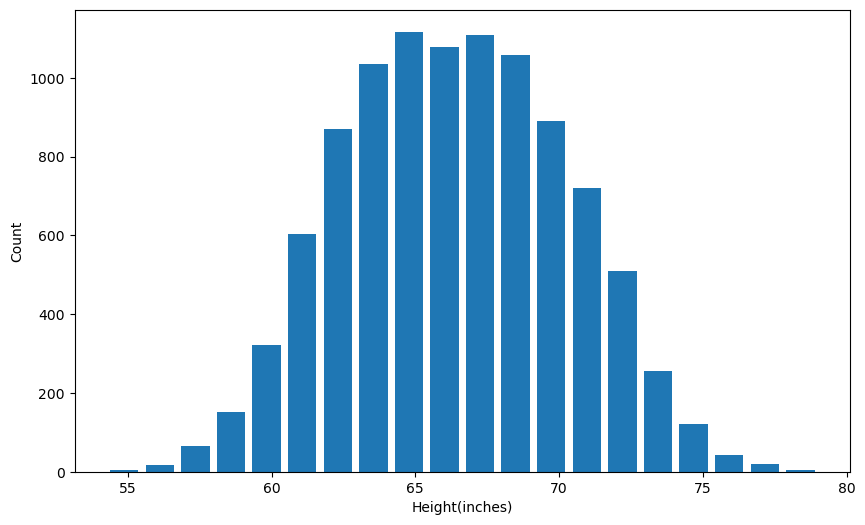

In [57]:
plt.hist(df_new.Height,bins=20,rwidth=0.80)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

### plotting a Bell Curve

In [58]:
from scipy.stats import norm

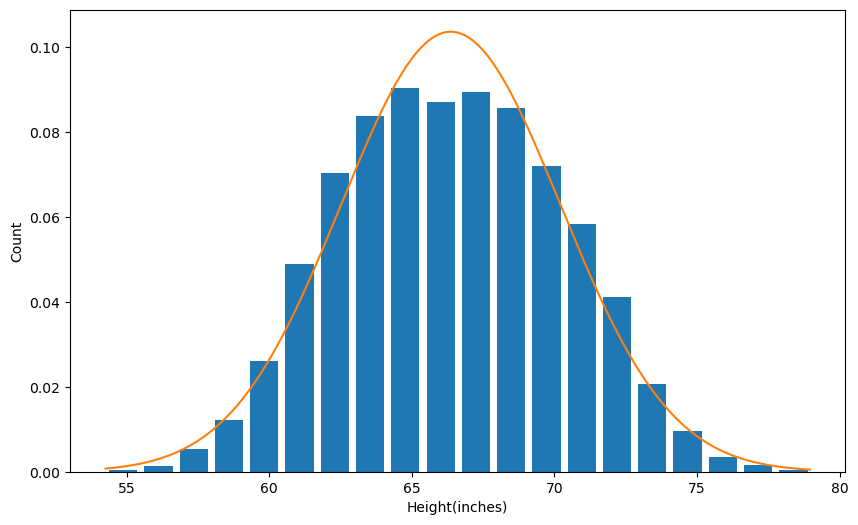

In [59]:
plt.hist(df_new.Height,bins=20,rwidth=0.80,density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(df_new.Height.min(),df_new.Height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df_new.Height.mean(),df_new.Height.std()))

### Applying standard deviation to remove Outlier

#### The standard in the industry is using +3 and -3 standard deviation to remove outliers

In [60]:
mean_h =df_new.Height.mean()# mean

In [61]:
std_h = df_new.Height.std() #This is one standard deviation

#### For 3 standard deviation

In [62]:
upper_limit= mean_h + 3* std_h

In [63]:
upper_limit

77.91014411714076

In [64]:
lower_limit = mean_h - 3* std_h

In [65]:
lower_limit

54.82497539250136

In [66]:
no_outlier =df_new[(df_new.Height> lower_limit) & (df_new.Height < upper_limit)]

In [67]:
no_outlier

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


# adding a new column to a dataframe

In [68]:
df_new['feet']=df_new.Height/12 # adding new column called feet

In [69]:
df_new

,Gender,Height,feet
0,Male,73.847017,6.153918
1,Male,68.781904,5.731825
2,Male,74.110105,6.175842
3,Male,71.730978,5.977582
4,Male,69.881796,5.823483
...,...,...,...
9995,Female,66.172652,5.514388
9996,Female,67.067155,5.588930
9997,Female,63.867992,5.322333
9998,Female,69.034243,5.752854


## Appending multiple column using lambda

In [70]:
xnew=df_new.assign(m2m= lambda x: df_new.Height * df_new.feet,
             new_name= lambda x: df_new.Gender+ '_identity')

In [71]:
xnew

,Gender,Height,feet,m2m,new_name
0,Male,73.847017,6.153918,454.448494,Male_identity
1,Male,68.781904,5.731825,394.245860,Male_identity
2,Male,74.110105,6.175842,457.692310,Male_identity
3,Male,71.730978,5.977582,428.777772,Male_identity
4,Male,69.881796,5.823483,406.955449,Male_identity
...,...,...,...,...,...
9995,Female,66.172652,5.514388,364.901658,Female_identity
9996,Female,67.067155,5.588930,374.833603,Female_identity
9997,Female,63.867992,5.322333,339.926702,Female_identity
9998,Female,69.034243,5.752854,397.143894,Female_identity


# Zscore tells you how many standard deviations you are away from the mean

In [72]:
df_z =pd.read_csv('heights.csv')

In [73]:
df_z.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [74]:
df_z.shape

(10000, 2)

In [75]:
df_z['zscore']=(df_z.height-df_z.height.mean())/df_z.height.std()

In [76]:
df_z

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [77]:
outlier = df_z[(df_z.zscore> 3) |(df_z.zscore <-3)]

In [78]:
outlier

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [79]:
no_outlier = df_z[(df_z.zscore< 3) &(df_z.zscore >-3)]

In [80]:
no_outlier

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


#### checking the number of row outliers you removed

In [81]:
df_z.shape[0]- no_outlier.shape[0]

7

## Note use the above Zscore or the standard deviation based on(-3 and 3 from the mean)

### Excersise

In [82]:
df_ex = pd.read_csv('bhp.csv')

In [83]:
df_ex.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [84]:
df_ex.shape

(13200, 7)

In [85]:
lower_b,upper_b =df_ex['price_per_sqft'].quantile([0.001,0.999])

In [86]:
lower_b,upper_b

(1366.184, 50959.36200000098)

In [87]:
df_ex[(df_ex.price_per_sqft< lower_b) | (df_ex.price_per_sqft > upper_b)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [88]:
no_outlier1 =df_ex[(df_ex.price_per_sqft> lower_b) & (df_ex.price_per_sqft < upper_b)]

In [89]:
no_outlier1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [90]:
df_ex.shape[0]-no_outlier.shape[0]

3207

## Using 4 standard deviation to get outlier

In [91]:
mean_value =no_outlier1.price_per_sqft.mean()

In [92]:
mean_value

6663.6537351958705

In [93]:
stan_dev = no_outlier1.price_per_sqft.std()

In [94]:
stan_dev

4141.020700174605

In [95]:
upper_limit =mean_value + 4*stan_dev

In [96]:
upper_limit

23227.73653589429

In [97]:
lower_limit =mean_value - 4*stan_dev

In [98]:
lower_limit

-9900.429065502549

In [99]:
show_outlier =no_outlier1[(no_outlier1.price_per_sqft > upper_limit) | (no_outlier1.price_per_sqft < lower_limit)]

In [100]:
show_outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [101]:
No_outlier =no_outlier1[(no_outlier1.price_per_sqft < upper_limit) & (no_outlier1.price_per_sqft > lower_limit)]

In [102]:
No_outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [117]:
no_outlier1.shape[0]-No_outlier.shape[0]

125

# Ploting histogram

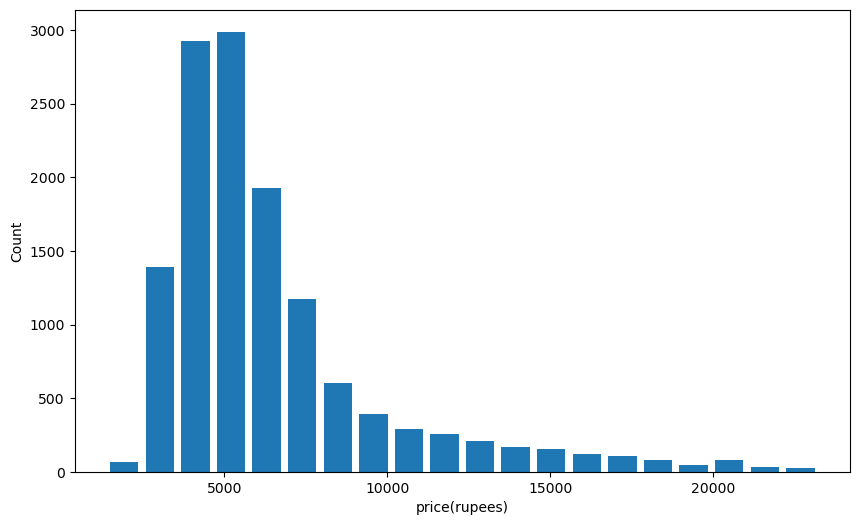

In [104]:
plt.hist(No_outlier.price_per_sqft,bins=20,rwidth=0.80)
plt.xlabel('price(rupees)')
plt.ylabel('Count')
plt.show()

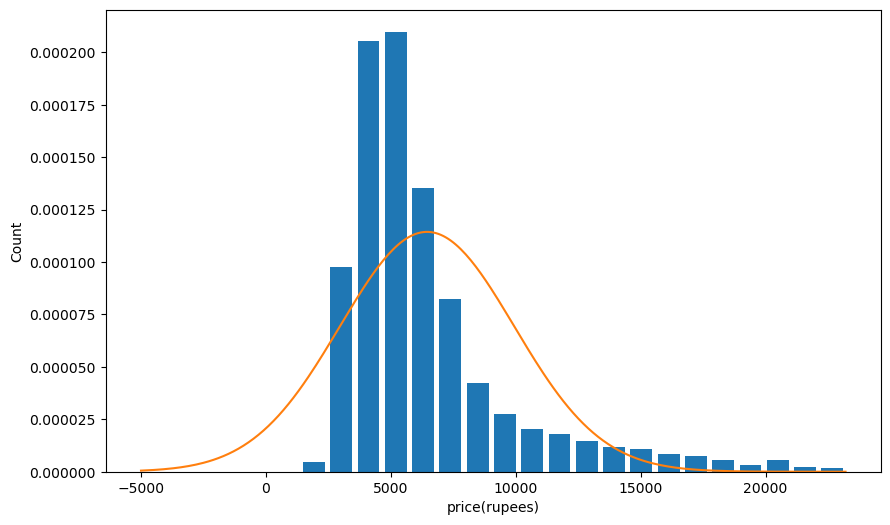

In [119]:
plt.hist(No_outlier.price_per_sqft,bins=20,rwidth=0.80,density=True)
plt.xlabel('price(rupees)')
plt.ylabel('Count')
rng = np.arange(-5000,No_outlier.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,No_outlier.price_per_sqft.mean(),No_outlier.price_per_sqft.std()))

## zscore to remove outliers

In [106]:
no_outlier1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [107]:
no_outlier1['zscore']=(no_outlier1.price_per_sqft-no_outlier1.price_per_sqft.mean())/no_outlier1.price_per_sqft.std()

C:\Users\USER\AppData\Local\Temp\ipykernel_33320\4062120194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outlier1['zscore']=(no_outlier1.price_per_sqft-no_outlier1.price_per_sqft.mean())/no_outlier1.price_per_sqft.std()


In [108]:
no_outlier1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


## using zscore of -4 and + 4 to identify outliers

In [109]:
clean_nolier =no_outlier1[(no_outlier1.zscore > -4) & (no_outlier1.zscore < 4) ]

In [110]:
clean_nolier

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [120]:
no_outlier1.shape[0]-clean_nolier.shape[0]

125